# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс. Нам предстоит изучить: откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов, сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются, какие факторы мешают привлечению клиентов.

## Краткое резюме проекта:

В ходе данного исследования мы рассмотрим набор данных, содержащий информацию о пользовательских сессиях, заказах и расходах на рекламные кампании. Для анализа нами предоставлены три основных набора данных:

`visits_info_short.csv`:

- User Id: Уникальный идентификатор пользователя.
- Region: Страна пользователя.
- Device: Тип устройства пользователя.
- Channel: Идентификатор источника перехода.
- Session Start: Дата и время начала сессии.
- Session End: Дата и время окончания сессии.

`orders_info_short.csv`:

- User Id: Уникальный идентификатор пользователя.
- Event Dt: Дата и время покупки.
- Revenue: Сумма заказа.

`costs_info_short.csv`:

- dt: Дата проведения рекламной кампании.
- Channel: Идентификатор рекламного источника.
- costs: Расходы на эту кампанию.

Цель исследования:

Целью данного анализа является выявление причин убыточности компании несмотря на значительные инвестиции в рекламу. Мы стремимся предложить рекомендации, которые позволят компании выйти на позитивную динамику.

## План работы:


1. **Загрузка данных и подготовка к анализу:**

    - Загрузим данные из соответствующих файлов и ознакомимся с ними.
    - Проверим наличие пропусков и дубликатов, а также убедимся в корректности типов данных, особенно в столбцах с датами.


2. **Изучение данных и предобработка:**

    - Создадим профили пользователей.
    - Определим минимальную и максимальную даты привлечения пользователей.
    - Определим страны, из которых приходят пользователи, и уточним, в какой стране больше всего платящих пользователей.
    - Проанализируем устройства, предпочитаемые пользователями, и сравним их с устройствами, предпочитаемыми платящими пользователями.
    - Изучим рекламные источники привлечения и определим наиболее эффективные каналы.


3. **Маркетинг:**

    - Рассчитаем общую сумму расходов на маркетинг и узнаем, как они распределены по рекламным источникам.
    - Построим визуализацию динамики изменения расходов во времени, учитывая недели и месяцы, для каждого источника.


4. **Оценка окупаемости рекламы:**

    - Рассчитаем CAC для каждого источника.
    - Проанализируем окупаемость рекламы с помощью графиков LTV, ROI и CAC.
    - Проверим конверсию пользователей и удержание. Построим и изучим графики конверсии и удержания.
    - Проанализируем окупаемость рекламы с учетом устройств, стран и рекламных каналов.


5. **Выводы и рекомендации:**

    - Выявим причины неэффективности привлечения пользователей.
    - Сформулируем рекомендации для отдела маркетинга, основанные на результатах анализа.

На основе этого плана мы приступим к анализу бизнес-показателей развлекательного приложения Procrastinate Pro+  и выявим полезные инсайты, которые помогут улучшить работу бизнеса и помочь компании разобраться с рекламными убытками.

## Загрузим данные и подготовим их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучим данные и выполним предобработку. Ответим на вопросы: Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [ ]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [ ]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [ ]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Промежуточный вывод (*далее пром.вывод*):**
Данные содержатся в трех датасетах. Сразу заметны неправильное наименование столбцов и некорректный тип данных у столбцов, содержащих даты и время. Эти моменты будут проработаны на этапе предобработки.

### Предобработка

In [ ]:
# приведем названия столбцов к одному виду
# visits = visits.rename(
#         columns={
#             'User Id': 'user_id',
#             'Region': 'region',
#             'Device': 'device',
#             'Channel': 'channel',
#             'Session Start': 'session_start',
#             'Session End': 'session_end',
#         })


# приведем названия столбцов к одному виду
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

# проверим успешность
visits.head(1)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


In [ ]:
# приведем названия столбцов к одному виду
orders = orders.rename(
        columns={
            'User Id': 'user_id',
            'Event Dt': 'event_dt',
            'Revenue': 'revenue',
        })

# проверим успешность
orders.head(1)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


In [ ]:
# приведем названия столбцов к одному виду
costs.columns = costs.columns.str.lower()

# проверим успешность
costs.head(1)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


In [ ]:
# проверим на пропуски
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [ ]:
# проверим на пропуски
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [ ]:
# проверим на пропуски
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [ ]:
# изменим тип данных
visits['session_start'] = pd.to_datetime(visits['session_start'])

visits['session_end'] = pd.to_datetime(visits['session_end'])

# проверим успешность
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [ ]:
# изменим тип данных
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# проверим успешность
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [ ]:
# изменим тип данных
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# проверим успешность
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [ ]:
# проверим на дубликаты
visits.duplicated().sum()

0

In [ ]:
# проверим на дубликаты
orders.duplicated().sum()

0

In [ ]:
# проверим на дубликаты
costs.duplicated().sum()

0

In [ ]:
# проверим на неявные дубликаты
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [ ]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [ ]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [ ]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

**Пром. вывод:**
Пропусков и дубликатов в данных обнаружено не было. Названия всех столбцов приведены к корректному формату (нижний регистр с нижним подчеркиванием). Типы данных с информацией по датам и времени были изменены на необходимые для дальнейшего анализа.

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [ ]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

### Начнем с функции для создания профилей пользователей:

In [ ]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles(visits, orders, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = (profiles['first_ts']).dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles  # возвращаем профили с CAC

In [ ]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


### Функция для подсчета Retention Rate (удержание):

In [ ]:
def get_retention(profiles, visits, observation_date, horizon_days, dimensions = [], ignore_horizon = False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(visits[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'})
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        result = result.div(result['cohort_size'], axis = 0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time

In [ ]:
# проверим функцию
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions = [])
retention_history

cohort_size    0         1         2         3         4  \
payer dt                                                                     
False 2019-05-01          868  1.0  0.191244  0.074885  0.047235  0.031106   
      2019-05-02          728  1.0  0.185440  0.111264  0.046703  0.035714   
      2019-05-03          807  1.0  0.175960  0.091698  0.053284  0.026022   
      2019-05-04          960  1.0  0.179167  0.096875  0.065625  0.027083   
      2019-05-05          935  1.0  0.193583  0.096257  0.065241  0.034225   
...                       ...  ...       ...       ...       ...       ...   
True  2019-10-15           42  1.0  0.404762  0.285714  0.261905  0.166667   
      2019-10-16           33  1.0  0.454545  0.333333  0.303030  0.121212   
      2019-10-17           38  1.0  0.315789  0.263158  0.210526  0.078947   
      2019-10-18           61  1.0  0.327869  0.327869  0.213115  0.213115   
      2019-10-19           59  1.0  0.406780  0.338983  0.254237  0.220339   

                         5         6         7         8         9        10  \
payer dt                                                                       
False 2019-05-01  0.021889  0.023041  0.012673  0.013825  0.011521  0.006912   
      2019-05-02  0.017857  0.015110  0.012363  0.008242  0.005495  0.012363   
      2019-05-03  0.035936  0.022305  0.022305  0.011152  0.009913  0.008674   
      2019-05-04  0.016667  0.019792  0.009375  0.013542  0.010417  0.011458   
      2019-05-05  0.020321  0.020321  0.018182  0.010695  0.004278  0.005348   
...                    ...       ...       ...       ...       ...       ...   
True  2019-10-15  0.119048  0.119048  0.142857  0.119048  0.190476  0.095238   
      2019-10-16  0.181818  0.272727  0.151515  0.181818  0.121212  0.181818   
      2019-10-17  0.105263  0.052632  0.105263  0.157895  0.131579  0.105263   
      2019-10-18  0.344262  0.147541  0.147541  0.196721  0.131148  0.147541   
      2019-10-19  0.203390  0.101695  0.203390  0.186441  0.152542  0.101695   

                        11        12        13  
payer dt                                        
False 2019-05-01  0.010369  0.004608  0.005760  
      2019-05-02  0.010989  0.012363  0.004121  
      2019-05-03  0.004957  0.004957  0.004957  
      2019-05-04  0.009375  0.004167  0.007292  
      2019-05-05  0.006417  0.009626  0.003209  
...                    ...       ...       ...  
True  2019-10-15  0.119048  0.047619  0.166667  
      2019-10-16  0.060606  0.060606  0.121212  
      2019-10-17  0.026316  0.157895  0.000000  
      2019-10-18  0.147541  0.114754  0.049180  
      2019-10-19  0.186441  0.101695  0.000000  

[344 rows x 15 columns]

### Функция для расчета конверсии:

In [ ]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета LTV:

In [ ]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC,
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Пром. вывод:**
На этом этапе мы создали функции для профилей, а так же расчёта и анализа LTV, ROI, удержания и конверсии.

- LTV (= Lifetime Value) — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок.
- ROI ( = Return On Investment) — окупаемость инвестиций.
- Удержание ( = Retention Rate) показывает, сколько пользователей из когорты относительно их изначального числа вернулись, то есть воспользовались продуктом или услугой, в последующие периоды.
- Конверсия (= Conversion Rate) — это процент пользователей когорты, совершивших какое-нибудь действие.

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Посмотрим профили пользователей и определим минимальную и максимальную даты привлечения пользователей.

In [ ]:
# минимальная дата приивлечения пользователей
min_analysis_date = costs['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [ ]:
# момент анализа согласно условиям проекта
observation_date = datetime(2019, 11, 1).date()
#горизонт анализа - 2 недели (14 дней)
horizon_days = 14
# создание опции «игнорировать горизонт»
ignore_horizon = False

# максимальная дата
max_analysis_date= observation_date - timedelta(days=horizon_days - 1)
max_analysis_date

datetime.date(2019, 10, 19)

In [ ]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


**Пром. вывод:** Функция для составления профилей пользователей была создана на предыдущем этапе, здесь мы можем увидеть первые 10 строк профилей. Минимальная дата привлечения - 1 мая 2019 года, максимальная - 19 октября 2019 года.

Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей?

In [ ]:
result_region = profiles.groupby('region').agg(
    общее_количество=('user_id', 'nunique'),
    платящие=('payer', 'sum'),
    доля=('payer', 'mean')
).sort_values(by='общее_количество', ascending=False)
result_region

,общее_количество,платящие,доля
region,,,
United States,100002,6902,0.069019
UK,17575,700,0.039829
France,17450,663,0.037994
Germany,14981,616,0.041119


**Пром. вывод:** Пользователи находятся в следующих странах: Соединенные Штаты Америки, Великобритания, Франция и Германия. Больше всего платящих пользователей проживает в США.

Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи?

In [ ]:
result_device = profiles.groupby('device').agg(
    общее_количество=('user_id', 'nunique'),
    платящие=('payer', 'sum'),
    доля=('payer', 'mean')
).sort_values(by='общее_количество', ascending=False)
result_device

,общее_количество,платящие,доля
device,,,
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468
Mac,30042,1912,0.063644


**Пром. вывод:** Пользователи используют Айфоны, Андроиды, ПК и Маки. В целом платящие пользователи чаще используют продукцию Apple, как мобильные устройства, так и ноутбуки/компьютеры. Наибольшая доля приходится на устройство Mac.

Определим каналы, из которых пришло больше всего платящих пользователей.

In [ ]:
result_channel = profiles.groupby('channel').agg(
    общее_количество=('user_id', 'nunique'),
    платящие=('payer', 'sum'),
    доля=('payer', 'mean')
).sort_values(by='общее_количество', ascending=False)
result_channel

,общее_количество,платящие,доля
channel,,,
organic,56439,1160,0.020553
FaceBoom,29144,3557,0.122049
TipTop,19561,1878,0.096007
OppleCreativeMedia,8605,233,0.027077
LeapBob,8553,262,0.030633
WahooNetBanner,8553,453,0.052964
RocketSuperAds,4448,352,0.079137
MediaTornado,4364,156,0.035747
YRabbit,4312,165,0.038265


**Пром. вывод:** Наибольшее число пользователей (в совокупности платящих и неплатящих) пришло органическим способом. Наибольшее число платящих пользователей пришло благодаря рекламе в FaceBoom.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Посчитаем общую сумму расходов на маркетинг.

In [ ]:
costs['costs'].sum()

105497.30000000002

**Пром. вывод:** На маркетинг в целом было потрачено 105 497.

Как распределяются траты на маркетинг по рекламным источникам?

In [ ]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Пром. вывод:** Больше всего денег ушло на рекламу в TipTop (54 751), меньше всего - на MediaTornado (954) и YRabbit (944).

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

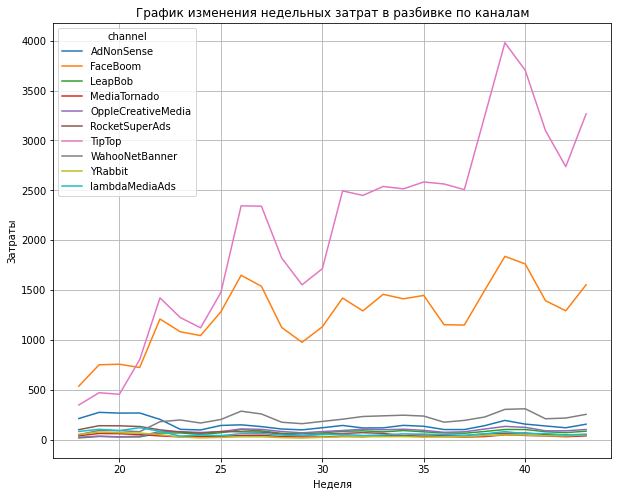

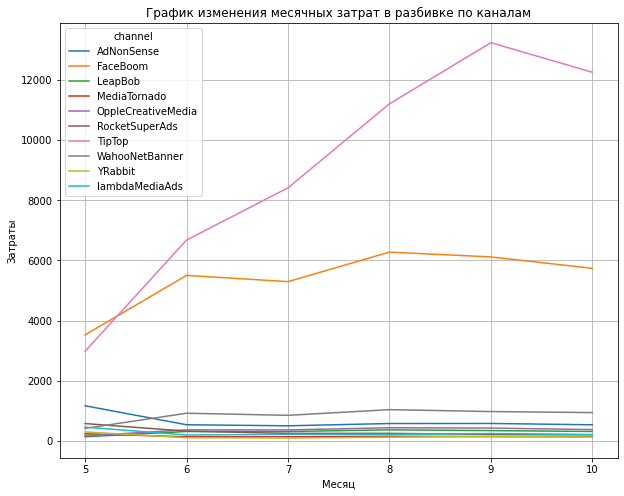

In [ ]:
# Преобразовываем 'dt' в формат datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# Создаем столбец 'week' с номерами недель
costs['week'] = costs['dt'].dt.isocalendar().week

# Группируем данные по неделям и каналам с суммированием расходов
result = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')

# Строим график
result.plot(grid=True, figsize=(10, 8))
plt.title('График изменения недельных затрат в разбивке по каналам')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()


# Создаем столбец 'week' с номерами месяцев
costs['month'] = costs['dt'].dt.month

# Группируем данные по неделям и каналам с суммированием расходов
result = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')

# Строим график
result.plot(grid=True, figsize=(10, 8))
plt.title('График изменения месячных затрат в разбивке по каналам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()

**Пром. вывод:** Резко выделяется увеличение затрат на два рекламных канала: Tip Top и FaceBoom. Особенно резко по Tip Top  выделяется 39 неделя (сентябрь).

Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника?

In [ ]:
profiles.groupby(by='channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Пром. вывод:** CAC, или Customer Acquisition Cost, — стоимость привлечения одного клиента. Наибольший CAC у пользователей, пришедших из Tip Top (в среднем привлечение одного такого пользователя стоило 2.8).

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Исключим органических пользователей, так как они будут влиять на анализ окупаемости рекламы.

In [ ]:
good_profiles = profiles.query('channel != "organic"')

### LTV, CAC и ROI в целом

In [ ]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

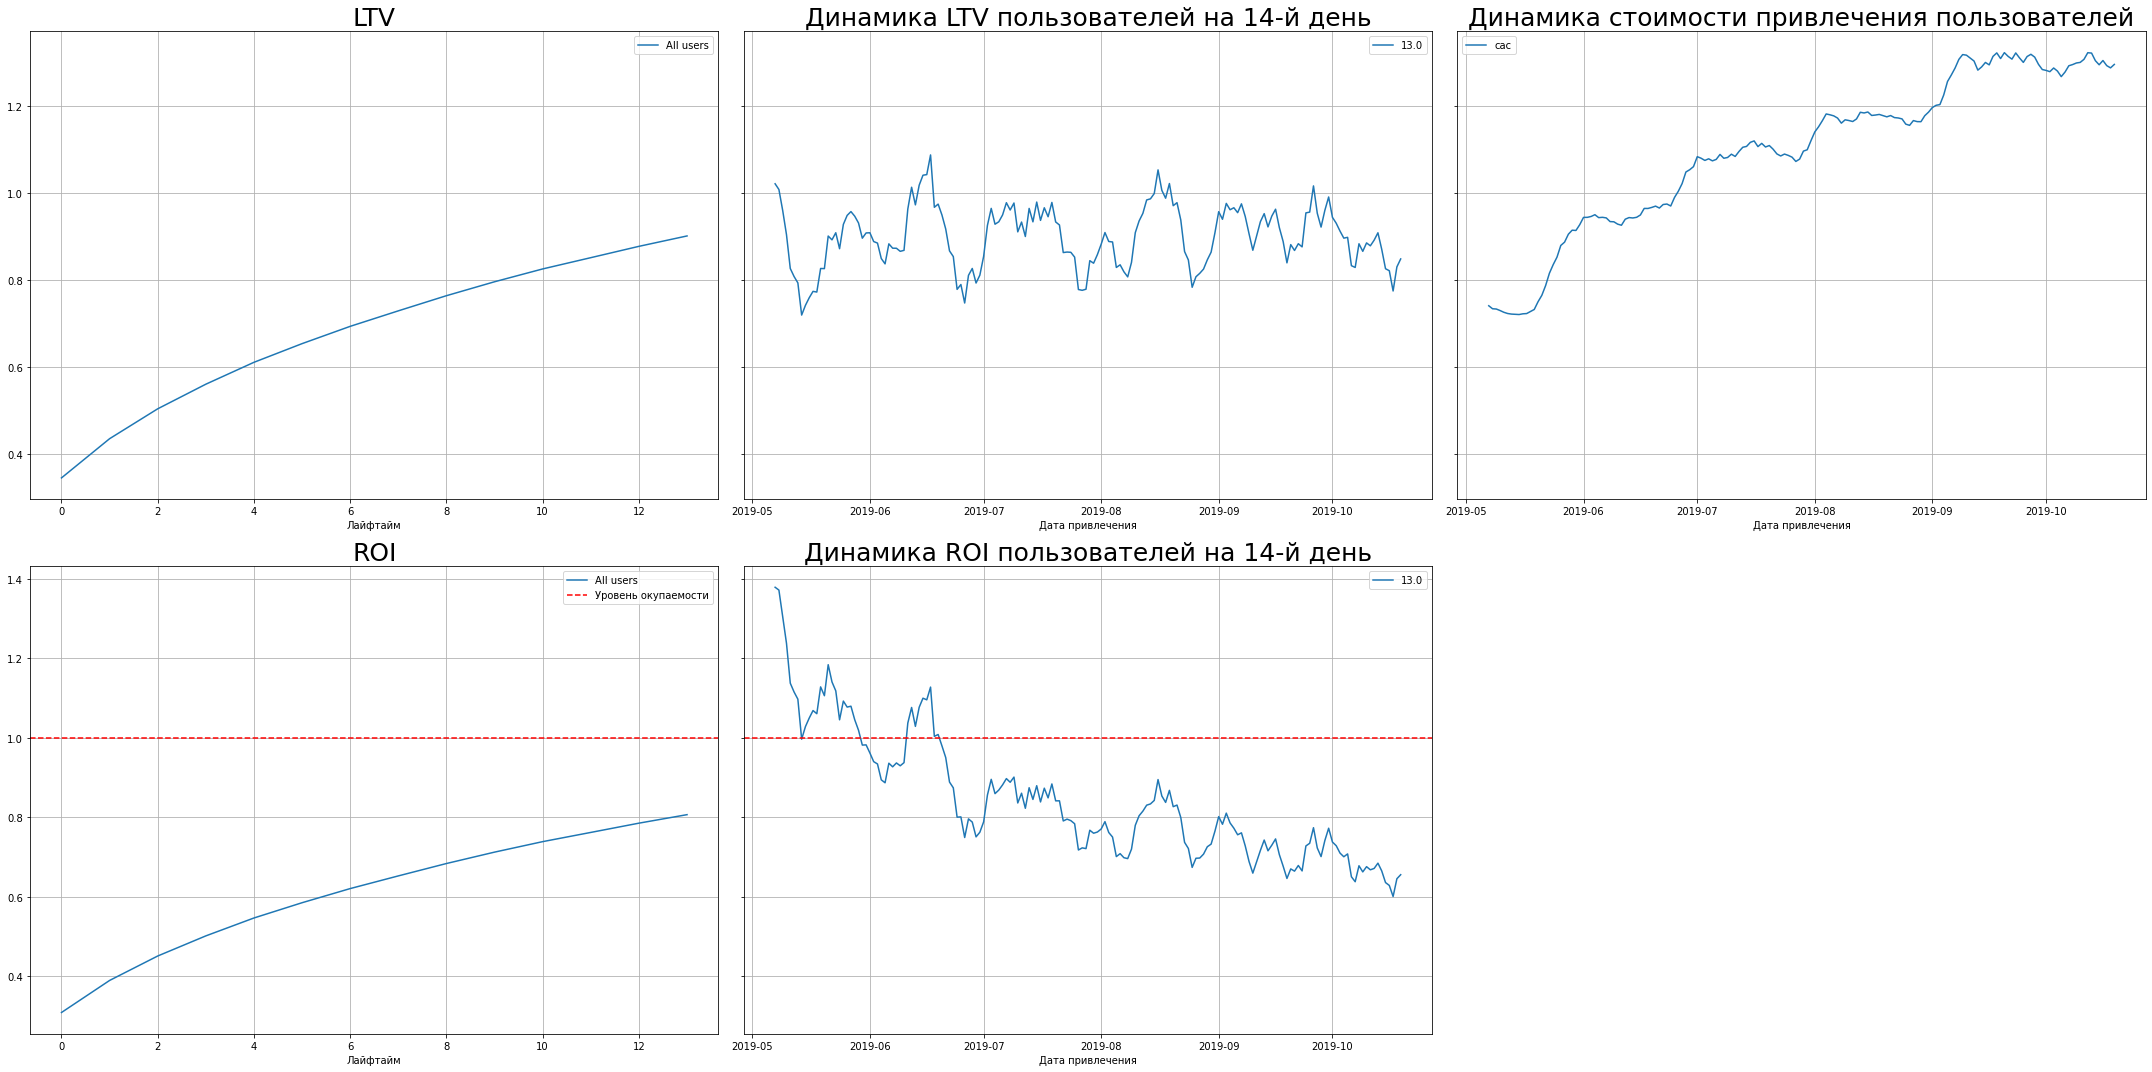

In [ ]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', fontsize=25)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=25)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize=25)


    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', fontsize=25)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=25)

    plt.tight_layout()
    plt.show()

# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    good_profiles,
    orders,
    observation_date,
    horizon_days,
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

**Пром. вывод:** По графикам видно, что LTV стабильно растет, как и стоимость привлечения клиента (CAC), а вот по графику ROI видно, что затраты на привлечение пользователей не окупаются, и динамика окупаемости на 14-1 день падает с течением времени.  

### Конверсия

In [ ]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

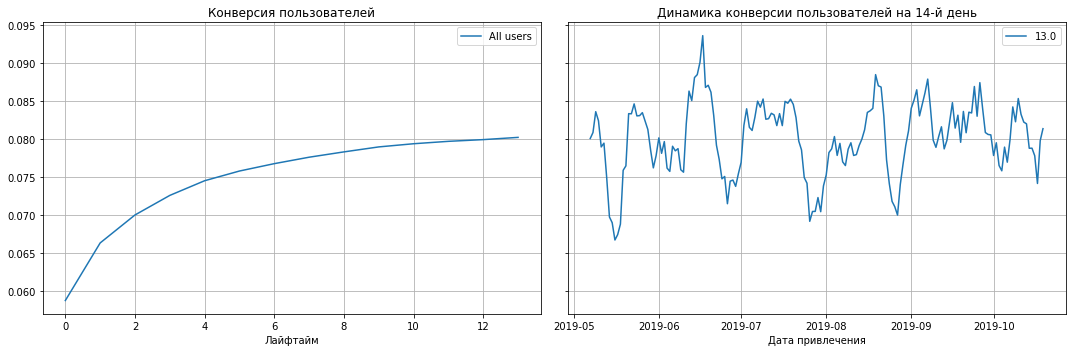

In [ ]:
def plot_conversion(conversion, conversion_history, horizon_days, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon_days - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show()

conversion_raw, conversion, conversion_history = get_conversion(
    good_profiles,
    orders,
    observation_date,
    horizon_days,
)
plot_conversion(conversion, conversion_history, horizon_days)

**Пром. вывод:** Конверсия пользователей растет, по динамике конверсии видны постоянные колебания.

### Удержание

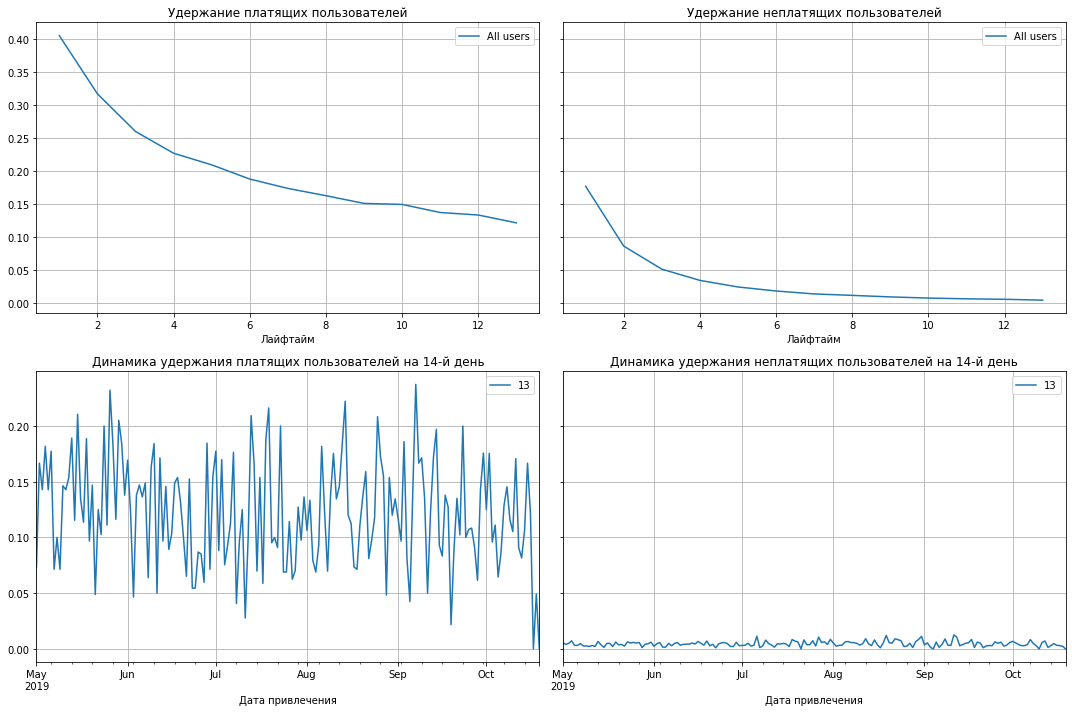

In [ ]:
def plot_retention(retention, retention_history, horizon_days):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon_days-1, aggfunc='mean'
    ).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon_days
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    # фильтруем данные, строим сводную таблицу и график по ней
    retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean'
    ).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon_days
        )
    )

    # исключаем наложение графиков друг на друга
    plt.tight_layout()

    plt.show()

plot_retention(retention, retention_history, horizon_days)

**Пром. вывод:** Удержание платящих пользователей выше, чем удержание неплатящих. Динамика удержания неплатящих пользователей более стабильна, но сильно ниже, чем динамика платящих.

### LTV, CAC и ROI с разбивкой по устройствам

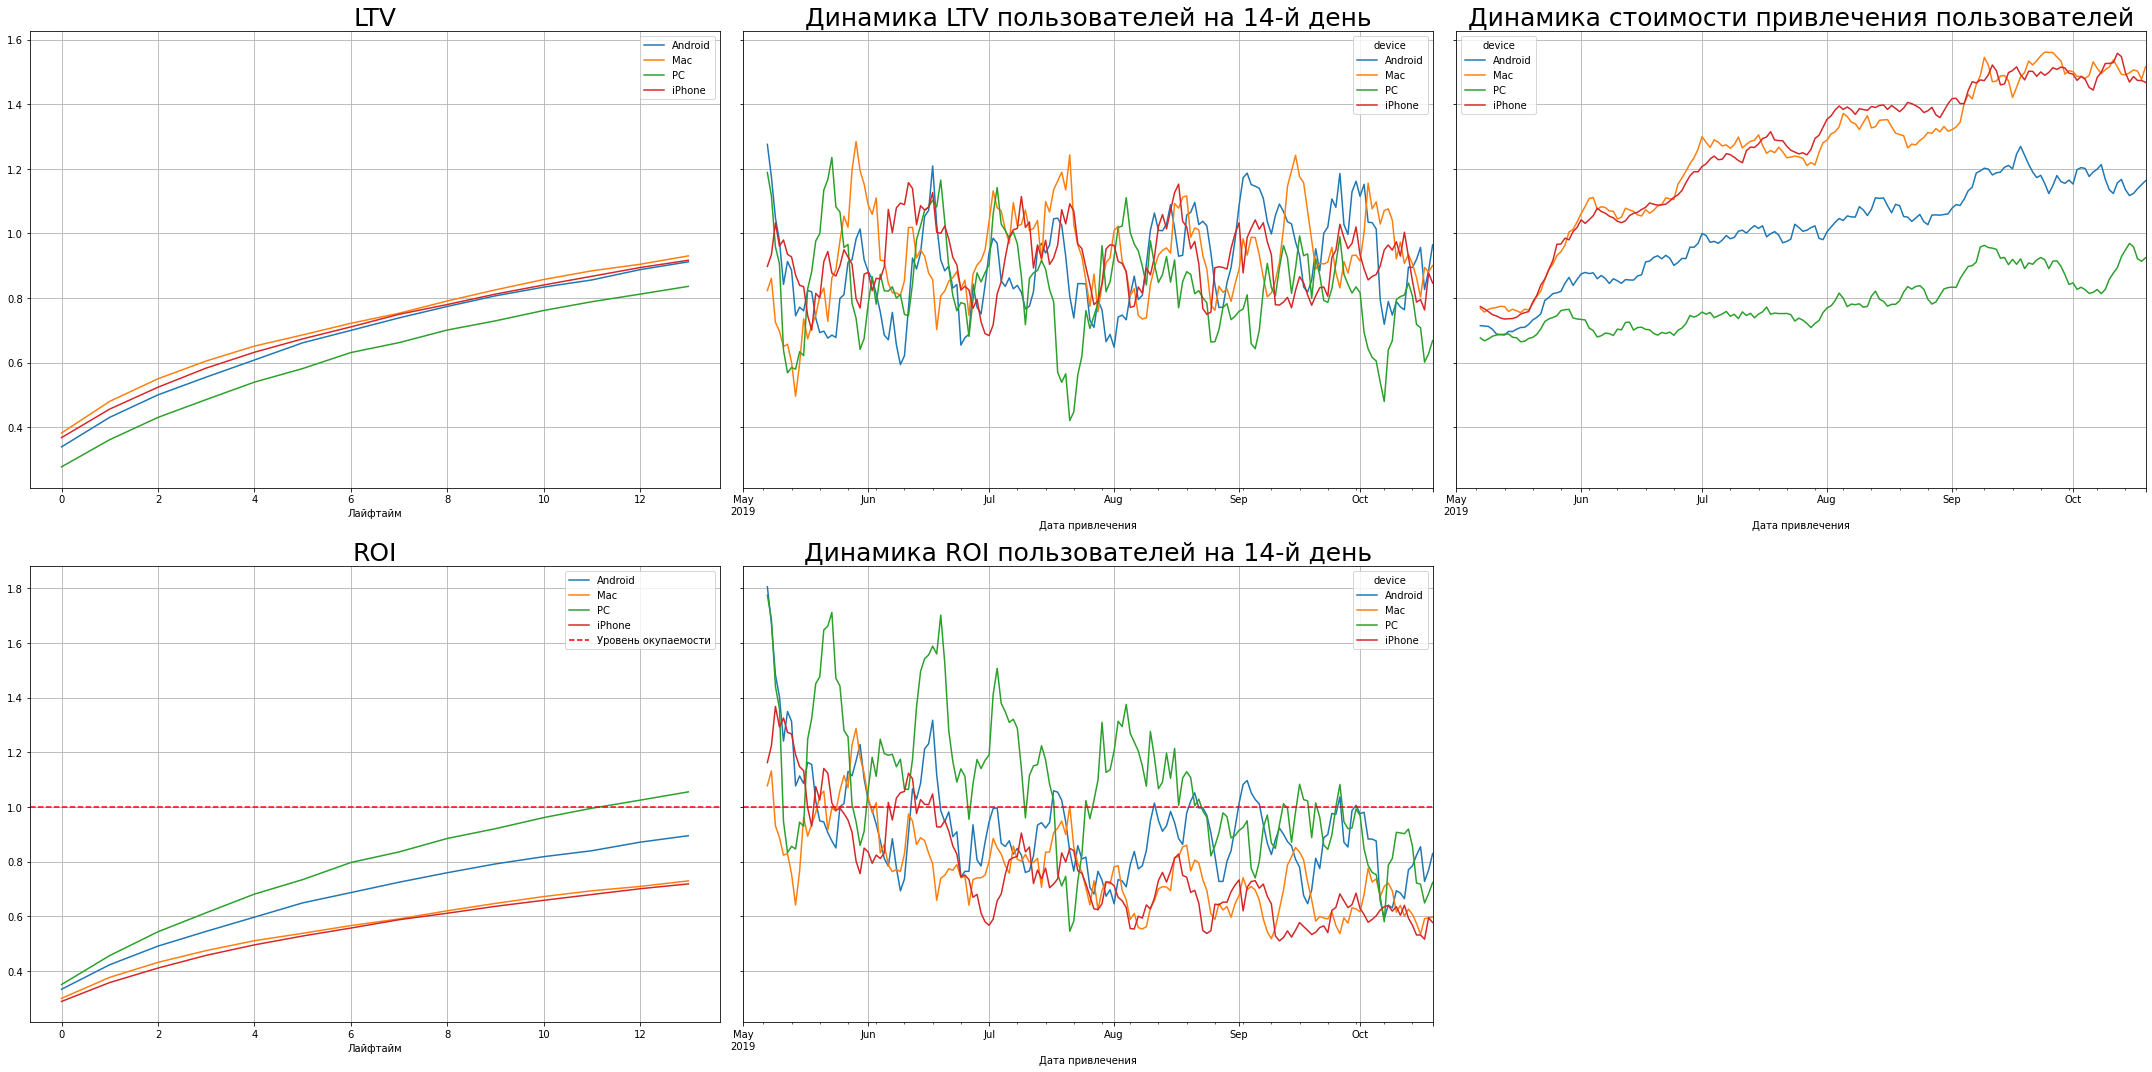

In [ ]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    good_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

**Пром. вывод:** На привлечение пользователей с iPhone и Mac компания отдает больше средств, чем на других клиентов. Но всех больше приближены к окупаемости находятся пользователи PC (они окупаются, подходя к концу лайфтайма), вероятно, это происходит не благодаря количеству и сумме покупок, совершаемых пользователем, а благодаря низкой стоимости их привлечения.

### LTV, CAC и ROI с разбивкой по регионам

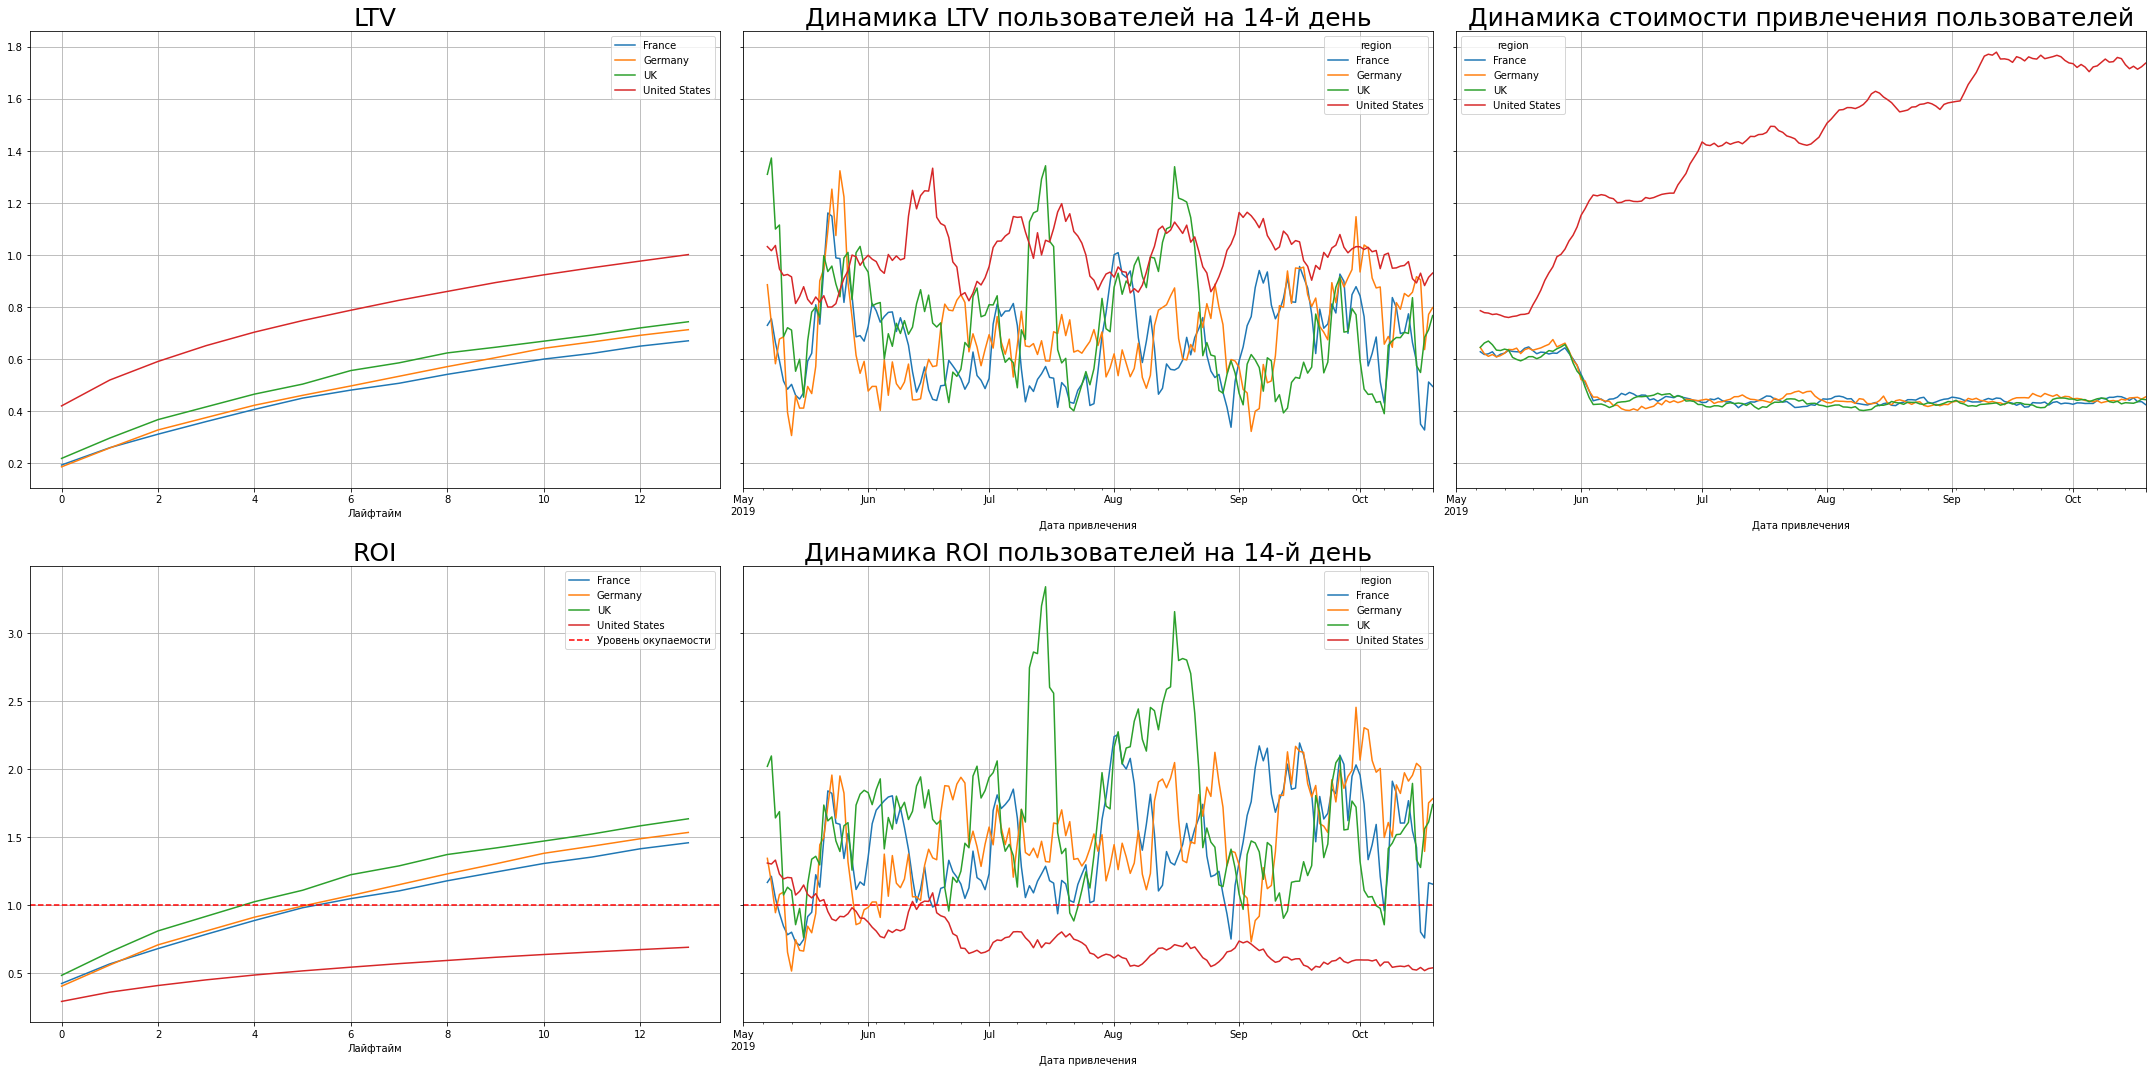

In [ ]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    good_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

**Пром. вывод:** Большее количество средств приносят компании пользователи из США, но стоимость их привлечения настолько выше пользователей из других регионов, что именно клиенты из этого региона совсем не окупаются. Показатели пользователей других трех регионов (Великобритания, Германия и Франция) идут рядом друг с другом, но больше из них выделяются пользователи из Великобритании, которые приносят бОльшую общую сумму денег, которую клиент в среднем приносит компании со всех своих покупок, и клиенты из этого региона быстрее окупаются.

### LTV, CAC и ROI с разбивкой по рекламным каналам

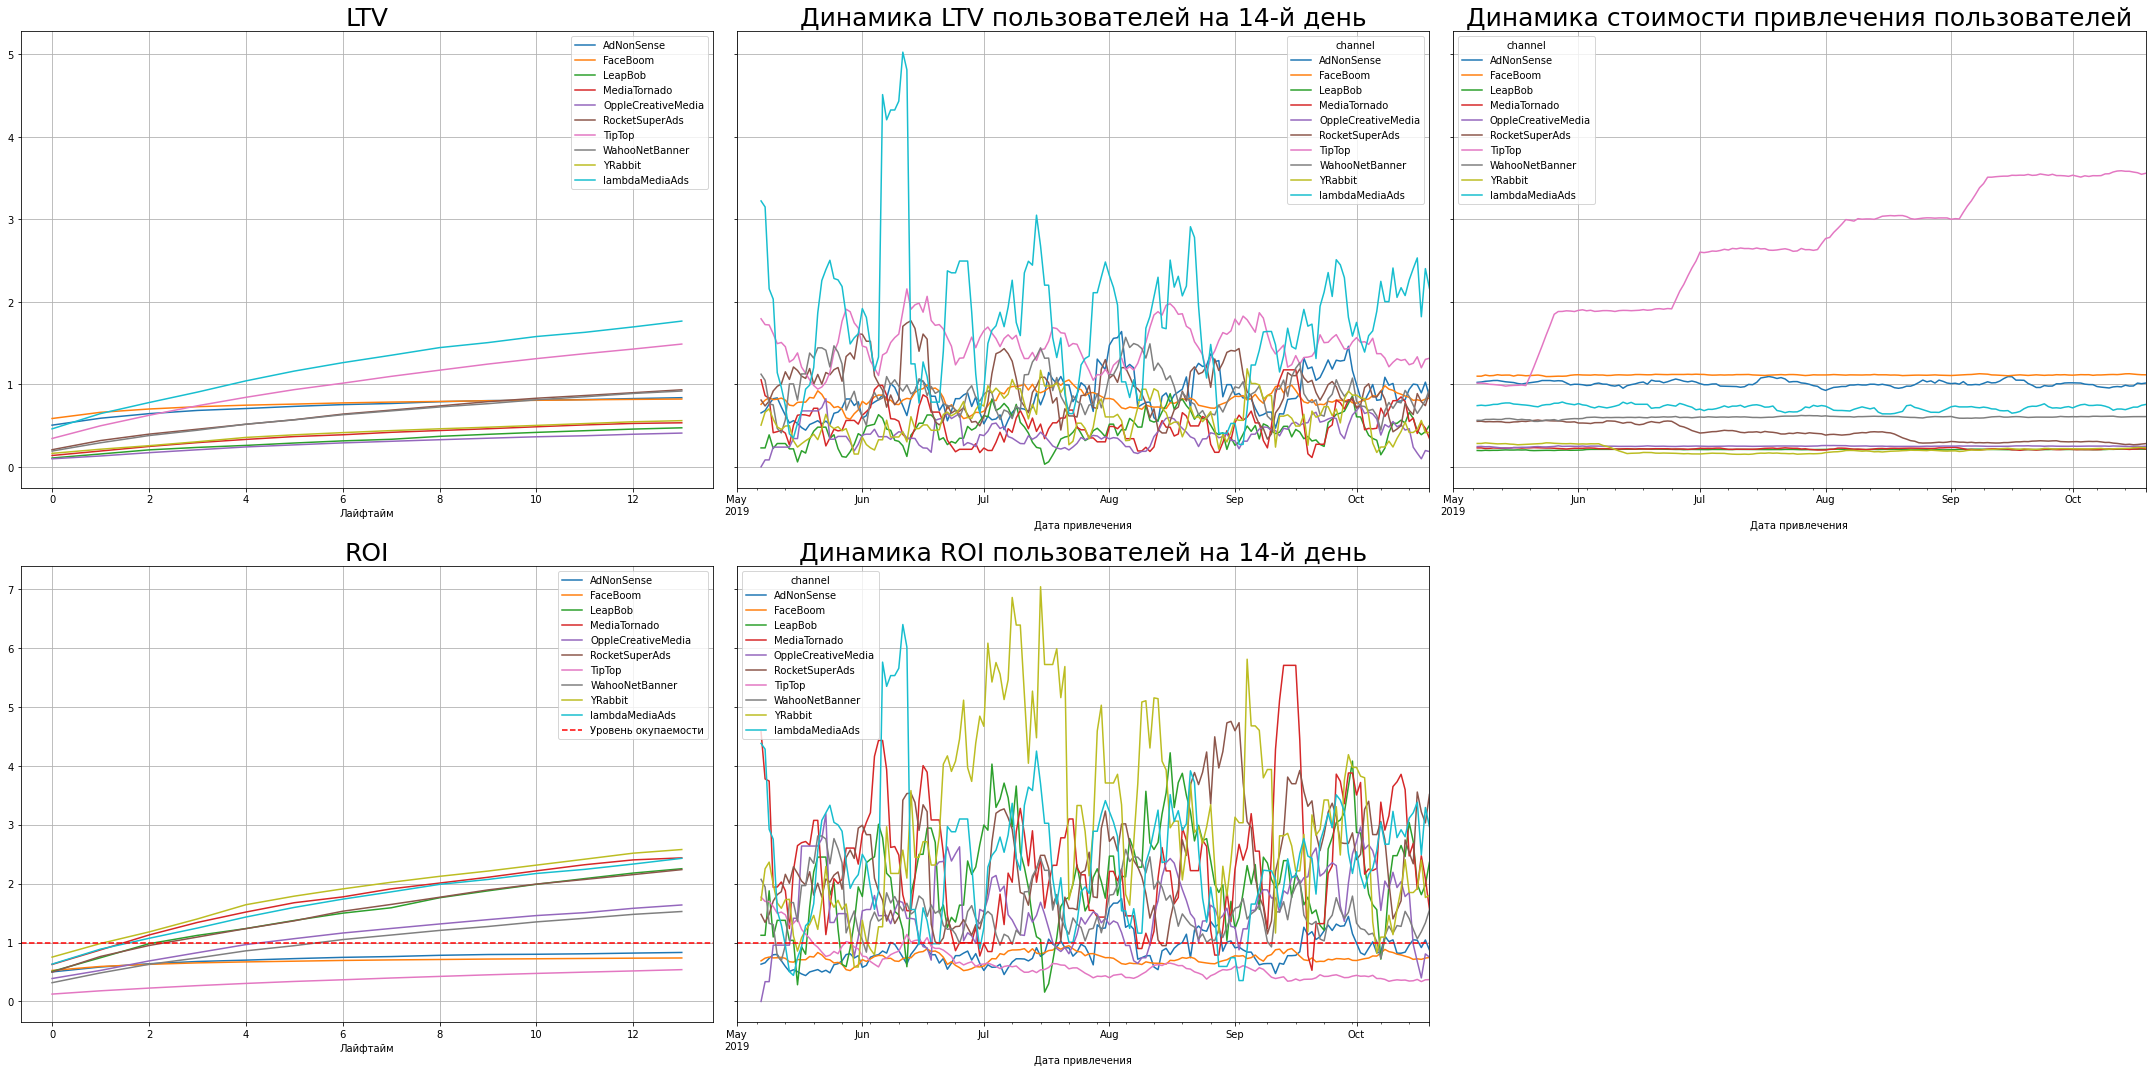

In [ ]:
# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    good_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
)

# строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

**Пром. вывод:** График LTV показывает, что больше суммарных покупок приносят пользователи, пришедшие из lambdaMediaAds и Tip Top, на графике динамики LTV эти два канала привлечения так же находятся выше, чем другие. Дороже всего компании обходится привлечение пользователей через Tip Top (вклады в рекламу помесячно растут). Всех лучше окупаются пользователи из YRabbit, совсем не окупаются: Tip Top, FaceBoom, AdNonSense. Неокупаемость пользователей, пришедших из Tip Top можно объяснить дороговизной рекламы.

### Конверсия с разбивкой по устройствам

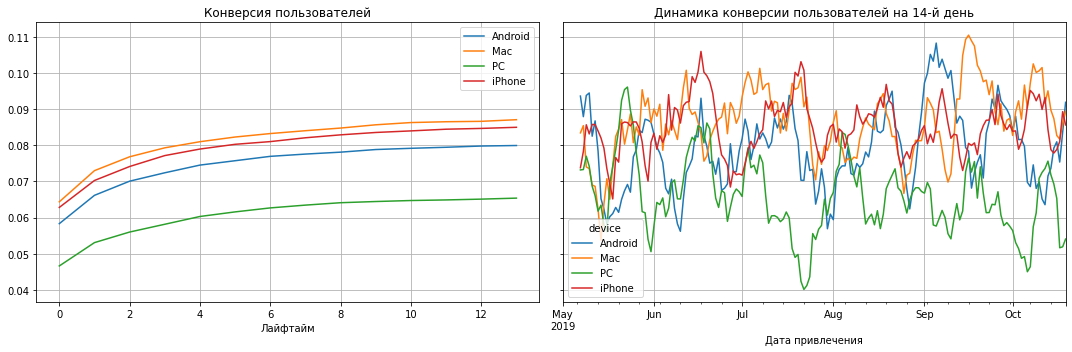

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    good_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
)
plot_conversion(conversion, conversion_history, horizon_days)

**Пром. вывод:** Конверсия пользователей с iPhone и Mac выше, а PC отстает.

### Конверсия с разбивкой по регионам

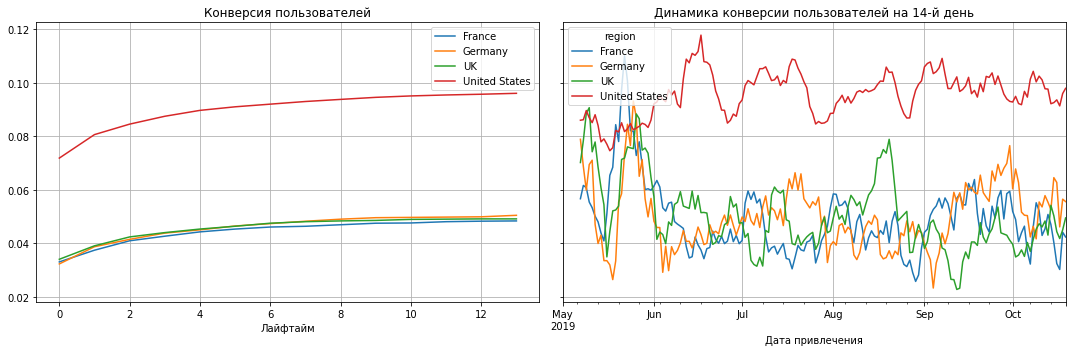

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    good_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
)
plot_conversion(conversion, conversion_history, horizon_days)

**Пром. вывод:** Конверсия пользователей из US сильно превышает другие регионы, но и по численности клиентов этот регион занимает первое место.

### Конверсия с разбивкой по рекламным каналам

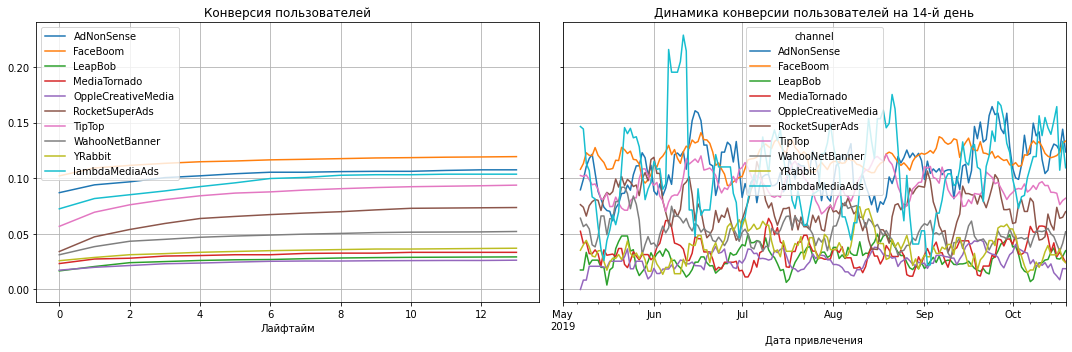

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    good_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
)
plot_conversion(conversion, conversion_history, horizon_days)

**Пром. вывод:** Самая высокая конверсия у: FaceBoom, AdNonSense и lambdaMediaAds (у последней заметен сильный скачок в динамике, приходящийся на первую половину июня).

### Удержание с разбивкой по устройствам

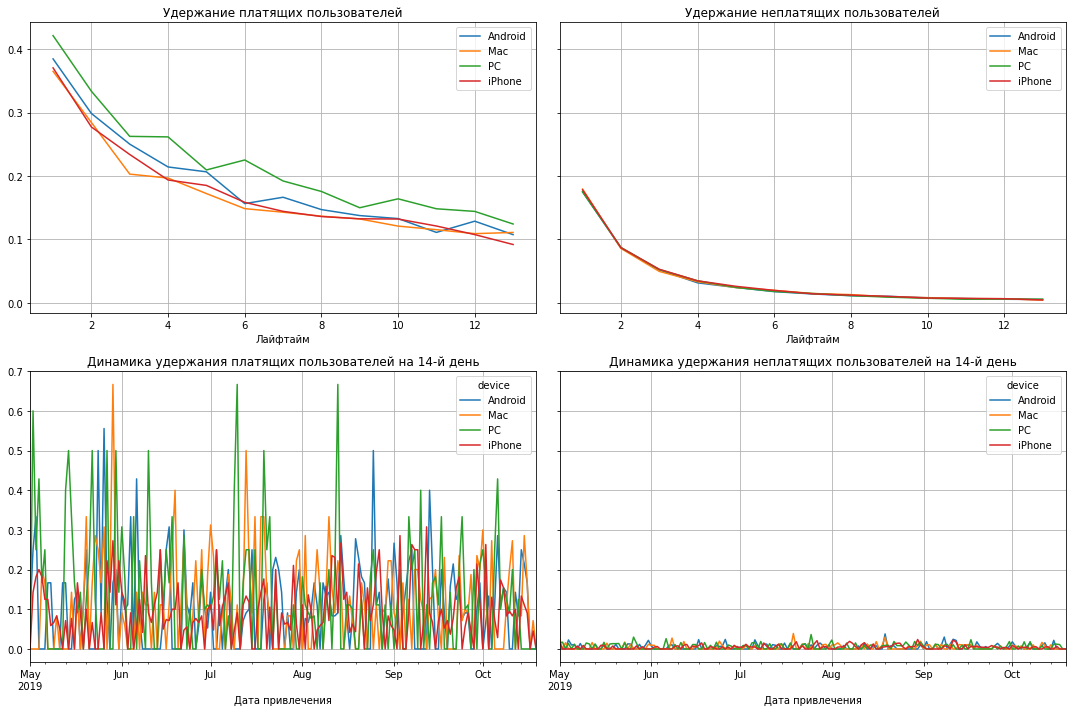

In [ ]:
retention_raw, retention, retention_history = get_retention(
    good_profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device']
)

plot_retention(retention, retention_history, horizon_days)

**Пром. вывод:** Удержание платящих пользователей по всем утсройствам выше, чем неплатящих. Выше всех удержание у платящих пользователей PC.  

### Удержание с разбивкой по регионам

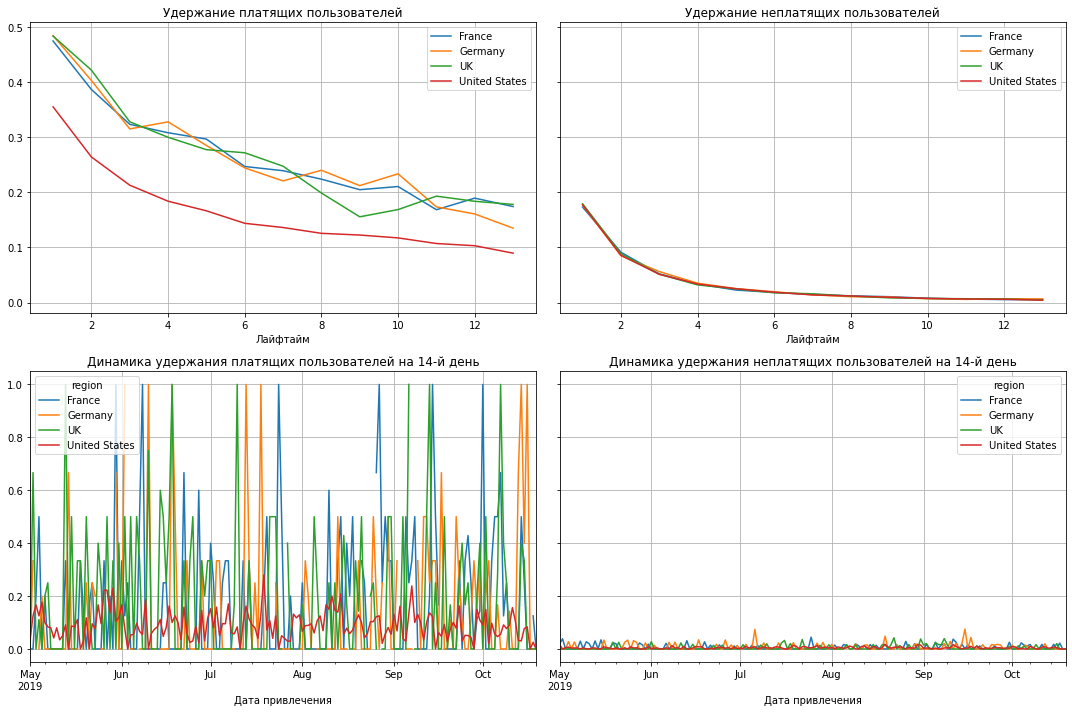

In [ ]:
retention_raw, retention, retention_history = get_retention(
    good_profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region']
)

plot_retention(retention, retention_history, horizon_days)

**Пром. вывод:** Самое низкое удержание среди платящих пользователей - у клиентов из US. Великобритания, Франция и Германия в целом держатся вместе наравне.

### Удержание с разбивкой по рекламным каналам

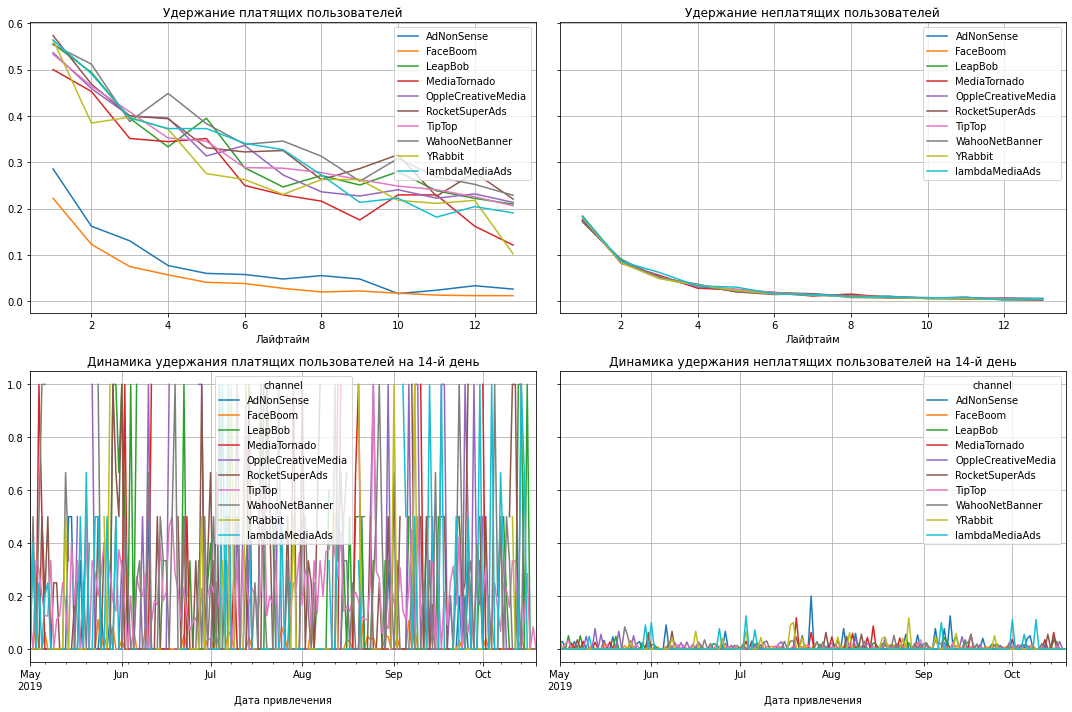

In [ ]:
retention_raw, retention, retention_history = get_retention(
    good_profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

plot_retention(retention, retention_history, horizon_days)

**Пром. вывод:** Среди неплатящих пользователей нельзя назвать отличающиейся каналы, они в целом все равны и явно ниже бОльшей части каналов платящих пользователей. Худшее удержание среди платящих у FaceBoom и AdNonSense.

**Ответим на следующие вопросы:**
- Окупается ли реклама, направленная на привлечение пользователей в целом?

    Нет, в совокупности реклама не окупается, а стоимость привлечения пользователей только растет.


- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

    На устройства iPhone и Mac уходит наибольше количество средств по привлечению клиентов, однако они совсем не окупаются. Из стран негативное влияние оказывают пользователи США, затраты на их привлечения в разы выше, чем на привлечение пользователей других стран, и несмотря на это, США - единственная страна, пользователи которой не окупают вложенные средства. Из рекламных каналов в негативном ключе сильно выделяется Tip Top, вложенные в него средства сильно выше, чем у других каналов, но именно этот канал всех меньше окупается (не окупается от слова совсем). Канал FaceBoom также показывает плохие результаты.


- Чем могут быть вызваны проблемы окупаемости?

    Проблемы окупаемости могут быть вызваны неверным выбором каналов привлечения (а точнее некорректным распределением средств среди этих каналов), а так же желанием привлечь пользователей, которые показывают не лучшие результаты в окупаемости (например, уклон к пользователям из США и пользователям продукции Apple)

Возможные причины обнаруженных проблем:

 - Нецелевой трафик: Вероятно, существует проблема с качеством трафика с устройств iPhone и Mac. Возможно, имеет смысл пересмотреть стратегию привлечения пользователей с этих устройств.

 - Высокие затраты в США: Высокие затраты на привлечение пользователей из США могут быть обусловлены высокой конкуренцией на этом рынке. Однако, не окупившись, эти затраты считаются неэффективными.

 - Низкая окупаемость канала Tip Top: Канал Tip Top требует внимательного анализа и возможно, корректировки стратегии. Вложения в этот канал существенно превышают возвращаемость.

Промежуточные рекомендации для рекламного отдела:

 - Оптимизация рекламных каналов: Необходимо провести более детальный анализ каждого рекламного канала и перераспределить бюджет с учетом окупаемости. Разделить каналы на те, которые приносят прибыль, и те, которые требуют корректировок.

 - Оптимизация по странам: Можно рассмотреть возможность перераспределения бюджета с учетом окупаемости разных стран. Может быть, стоит сократить расходы в странах с низкой окупаемостью и увеличить в более прибыльных.

 - Мониторинг каналов: Провести более глубокий анализ канала Tip Top, чтобы понять, почему он не окупается. Стоит рассмотреть возможность оптимизации затрат или даже прекращения инвестирования в него.

Эти рекомендации позволят сделать расходы на маркетинг более эффективными и улучшить окупаемость рекламных кампаний.

## Вывод

В рамках данного проекта мы провели анализ данных о маркетинговых затратах и окупаемости пользователей развлекательного приложения Procrastinate Pro+, сфокусировавшись на оценке эффективности рекламных кампаний.

Начальные данные представляли собой 3 датасета: `visits_info_short.csv` с информацией о пользователях (стране проживания, типе устройства, источнике перехода), `orders_info_short.csv` - с датой и временем покупки и суммой заказа, и `costs_info_short.csv` - с датой проведения рекламной кампании, идентификатором рекламного источника и расходами на эту кампанию

Первоначальный этап включал в себя загрузку данных и подготовку их к анализу. Были произведены необходимые преобразования, а также проверка на пропуски и дубликаты (в данных обнаружено не было), что позволило обеспечить корректность и надежность исходных данных.

**Исследовательский анализ данных выявил ряд важных закономерностей и показателей, среди которых стоит выделить следующие:**

1. Определены минимальная дата привлечения - 1 мая 2019 года, и максимальная - 19 октября 2019 года.

2. Пользователи находятся в следующих странах: Соединенные Штаты Америки, Великобритания, Франция и Германия. Больше всего платящих пользователей проживает в США.

3. Пользователи используют Айфоны, Андроиды, ПК и Маки. В целом платящие пользователи чаще используют продукцию Apple, как мобильные устройства, так и ноутбуки/компьютеры. Наибольшая доля приходится на устройство Mac.

4. Наибольшее число пользователей (в совокупности платящих и неплатящих) пришло органическим способом. Наибольшее число платящих пользователей пришло благодаря рекламе в FaceBoom, однако удержание пришедших клиентов самое низкое именно у этого канала.

**Маркетинговое исследование показало, что**:

1. На маркетинг в целом было потрачено 105 497.

2. Больше всего денег ушло на рекламу в TipTop (54 751), меньше всего - на MediaTornado (954) и YRabbit (944). Соответственно и CAC наибольший у пользователей, пришедших из Tip Top (в среднем привлечение одного такого пользователя стоило 2.8).

По оценке окупаемости рекламы можно сказать следующее: реклама не окупается, а стоимость привлечения пользователей только растет.

**Причины неэффективности привлечения пользователей:**

1. **Нерациональное распределение рекламного бюджета:** Наблюдается перекос в затратах на рекламные каналы. Особенно отмечается высокий уровень затрат на канал Tip Top, при этом окупаемость от этого канала крайне низка.

2. **Высокие затраты на привлечение пользователей с устройств Apple:** Заметно, что для пользователей с устройствами iPhone и Mac компания тратит значительные средства, однако окупаемость от этой аудитории оставляет желать лучшего.

3. **Проблемы с рекламными источниками в США:** Пользователи из США привлекаются с высокими затратами, но при этом показывают низкую окупаемость.

**Рекомендации для отдела маркетинга:**

1. **Оптимизировать распределение рекламного бюджета:** Провести перераспределение средств в пользу более эффективных каналов привлечения. При этом, необходимо уменьшить инвестиции в канал Tip Top, который показал низкую окупаемость.

2. **Обратить внимание на окупаемость аудитории с устройств Apple:** Проанализировать покупательское поведение пользователей с устройствами iPhone и Mac. Возможно, стоит пересмотреть подход к привлечению этой аудитории или скорректировать стратегию работы с ней. А также обратить внимание на пользователей с PC, которые показывают хорошую окупаемость.

3. **Разработать индивидуальные стратегии для разных стран:** Учитывая различия в показателях окупаемости по странам, предлагается выработать адаптированные подходы к каждому региону. Например, сократить затраты на США и активизировать работы по привлечению пользователей из более успешных регионов.

Эти меры помогут компании повысить эффективность рекламных кампаний и снизить финансовые риски, что, в свою очередь, приведет к улучшению общих показателей компании.